### Тема "Обучение без учителя"

### Задание 1

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
data = boston.data

In [4]:
target = boston.target

In [5]:
feature_names = boston.feature_names

In [6]:
X = pd.DataFrame(data, columns = feature_names)

In [7]:
y = pd.DataFrame(target, columns = ['price'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
scaler = StandardScaler(with_mean = False)

In [11]:
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [14]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train.columns)

In [18]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [19]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

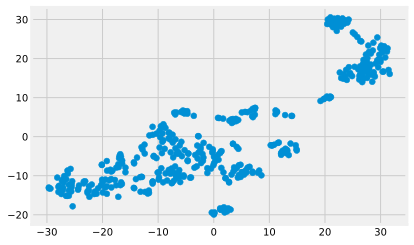

In [20]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

In [30]:
kmeans = KMeans(n_clusters = 3, random_state = 42, max_iter = 100)

In [45]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [32]:
labels_test = kmeans.predict(X_test_scaled)

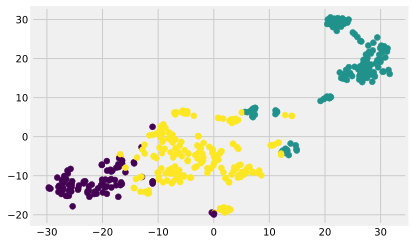

In [35]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.show()

In [36]:
y_train[labels_train == 0].mean()

price    27.788372
dtype: float64

In [37]:
y_train[labels_train == 1].mean()

price    16.165354
dtype: float64

In [38]:
y_train[labels_train == 2].mean()

price    24.958115
dtype: float64

In [40]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.07356558139534886

In [41]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.797028425196853

In [42]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.42166020942408367

### Задание 3

In [44]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [46]:
y_test[labels_test == 0].mean()

price    33.871429
dtype: float64

In [47]:
y_test[labels_test == 1].mean()

price    21.55283
dtype: float64

In [48]:
y_test[labels_test == 2].mean()

price    16.437143
dtype: float64

In [49]:
X_test.loc[labels_test == 0, 'CRIM'].mean()

0.08618571428571427

In [50]:
X_test.loc[labels_test == 1, 'CRIM'].mean()

0.25200716981132076

In [51]:
X_test.loc[labels_test == 2, 'CRIM'].mean()

10.165531142857143